In [1]:
import pandas as pd

data = pd.read_csv('data/morizon-2024-08-14.csv', sep=',')
data = data.dropna(subset=['price_per_metr'])
df = data.drop(['Unnamed: 0', 'price', 'Date_add', 'title', 'Date_update', 'url'], axis=1)
df['rooms'] = df['rooms'].apply(lambda x: x.split()[1])
df['floor'] = df['floor'].apply(lambda x: 0 if x.split()[1] != 'piętro' else x.split()[2].split('/')[0])
df['location'] = df['location'].apply(lambda x: ','.join(x.split(',')[:2]) if x.split(',')[0] != 'Kraków M.' else  ','.join(x.split(',')[1:3]))
df['location'] = df['location'].apply(lambda x: x[1:] if x[0] == ' ' else x)
df = df.drop(df[df['location'].isin(['małopolskie, Kraków', 'Kraków, Kraków', 'Kraków'])].index)

def f(x):
    xs = x.split(', ')
    return ', '.join([xs[0], xs[1].split('-')[1]]) if xs[1].split('-')[0] == 'Kraków' else x
    
df['location'] = df['location'].apply(lambda x: f(x))

df['Size (m2)'] = df['Size (m2)'].str.replace(',', '.').astype(float)
df['text'] = df['text'].str.replace('✅', '')

df = df.drop(df['text'][df['text'].isna()].index)
df

,price_per_metr,rooms,floor,location,text,Size (m2)
1,19503.0,2,7,"Kraków, Prądnik Biały",Najważniejsze atuty Teren zielony znajdujący...,42.25
2,16271.0,3,3,"Kraków, Os. Prądnik Biały",Oferuję na sprzedaż 3 pokojowe mieszkanie z os...,59.00
3,14500.0,2,0,"Kraków, Dębniki",Oferujemy Państwu mieszkanie o powierzchni 4...,44.00
4,16690.0,3,7,"Kraków, Wola Duchacka Wschód",Mam Państwu do zaoferowania widokowe mieszkani...,57.73
5,11745.0,2,0,"Kraków, Nowa Huta",2-3 pokoje/51m 2/ Nowa Huta/oś. Na SkarpieSupe...,51.00
...,...,...,...,...,...,...
663,16230.0,2,1,"Kraków, Wola Justowska",Mam zaszczyt przedstawić Państwu ekskluzywny a...,61.00
664,13801.0,3,4,"Kraków, Dębniki",Czerski nieruchomości prezentuję na sprzedaż f...,63.40
665,14685.0,2,2,"Kraków, Nowa Huta",Do sprzedaży mieszkanie 2-pokojowe o powierz...,52.91
666,19648.0,4,0,"Kraków, Podgórze",Na sprzedaż mieszkanie w stanie deweloperskim ...,142.00


In [2]:
dum_df = pd.get_dummies(df, columns=['rooms', 'floor', 'location'])
dum_df.head()

,price_per_metr,text,Size (m2),rooms_1,rooms_2,rooms_3,rooms_4,rooms_5,rooms_6,floor_0,...,"location_Kraków, Wola Duchacka","location_Kraków, Wola Duchacka Wschód","location_Kraków, Wola Justowska","location_Kraków, Wzgórza Krzesławickie","location_Kraków, Zabłocie","location_Kraków, Zwierzyniec","location_Kraków, os. Krakowiaków","location_Kraków, os. Zielone","location_Kraków, Łagiewniki-Borek Fałęcki","location_Kraków, Śródmieście"
1,19503.0,Najważniejsze atuty Teren zielony znajdujący...,42.25,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,16271.0,Oferuję na sprzedaż 3 pokojowe mieszkanie z os...,59.00,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,14500.0,Oferujemy Państwu mieszkanie o powierzchni 4...,44.00,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,16690.0,Mam Państwu do zaoferowania widokowe mieszkani...,57.73,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,11745.0,2-3 pokoje/51m 2/ Nowa Huta/oś. Na SkarpieSupe...,51.00,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


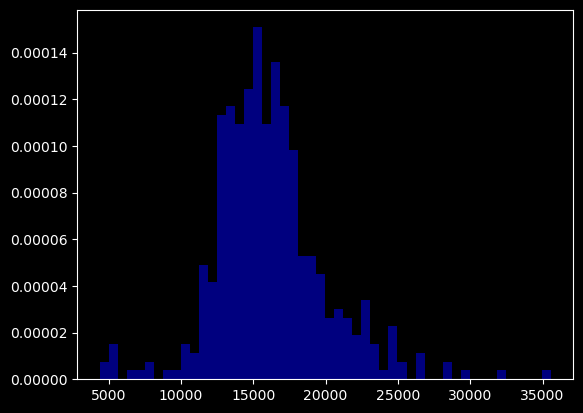

In [3]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")
plt.hist(dum_df['price_per_metr'], 50,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

In [4]:
dum_df.drop(dum_df[dum_df.price_per_metr > 40000].index,inplace=True)

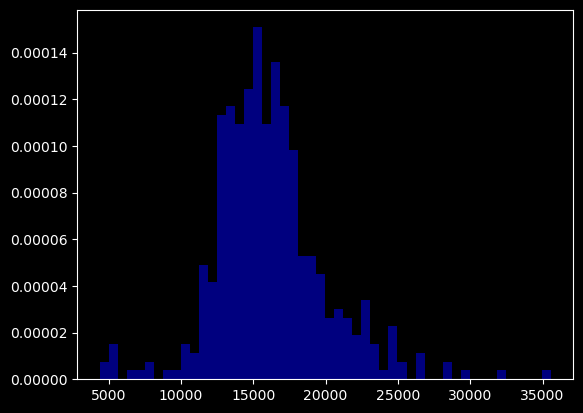

In [5]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")
plt.hist(dum_df['price_per_metr'], 50,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

In [6]:
dum_df.drop('text', axis=1).corr()['price_per_metr'].head(50)

price_per_metr                           1.000000
Size (m2)                               -0.204760
rooms_1                                  0.127219
rooms_2                                  0.120450
rooms_3                                 -0.085982
rooms_4                                 -0.096415
rooms_5                                 -0.102576
rooms_6                                 -0.164455
floor_0                                  0.064982
floor_1                                  0.027500
floor_10                                -0.007262
floor_11                                -0.017004
floor_13                                 0.085251
floor_14                                 0.130395
floor_2                                  0.036422
floor_3                                 -0.087976
floor_4                                 -0.058570
floor_5                                 -0.116980
floor_6                                  0.021501
floor_7                                  0.095821


<Axes: >

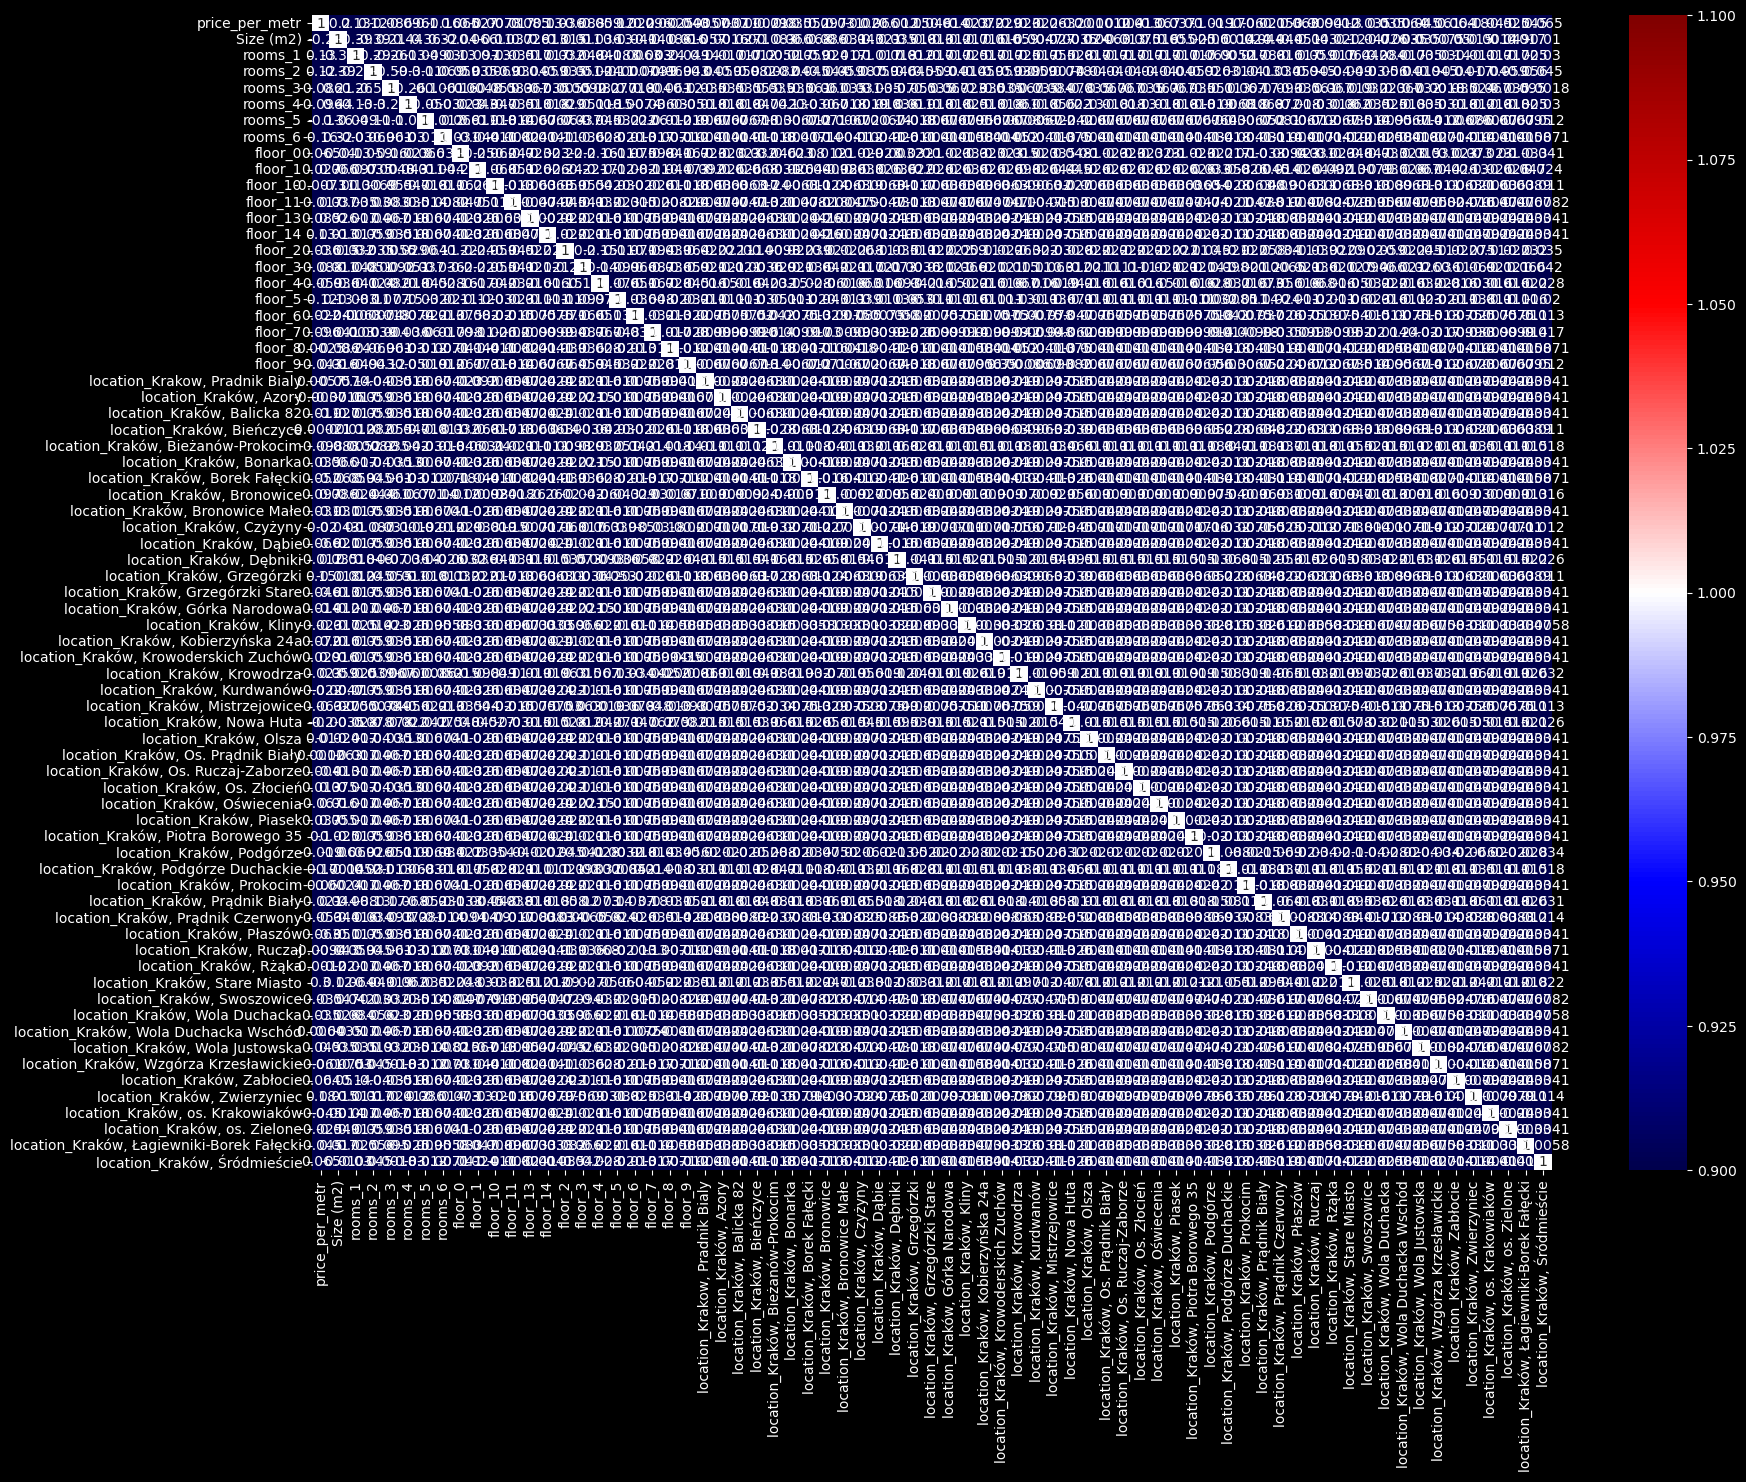

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(20,15))
plt.style.use('dark_background')

sns.heatmap(dum_df.drop('text', axis=1).corr(), cmap='seismic', annot=True, vmin=1, vmax=1)

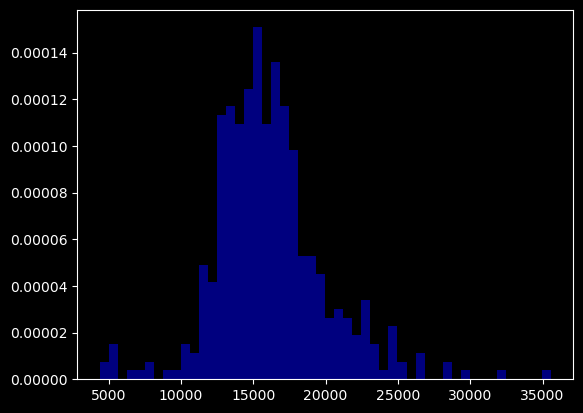

In [8]:
plt.hist(dum_df['price_per_metr'], 50,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

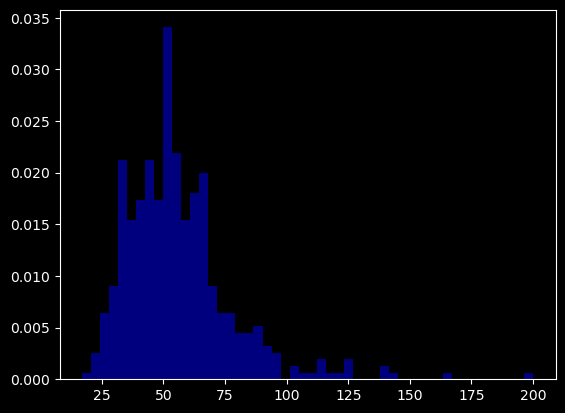

In [9]:
plt.hist(dum_df['Size (m2)'], 50,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

___
## Regresja

In [10]:
from sklearn.linear_model import LinearRegression

y = dum_df['price_per_metr']
X = dum_df.drop(['price_per_metr', 'text'], axis=1)

reg = LinearRegression().fit(X, y)

In [11]:
reg.score(X, y) # R^2

0.4185010233671398

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test) # R^2

-0.23435976902779743

___
## Walidacja krzyżowa

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)
scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5)
print(list(scores))
print()
print("Mean R^2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.009403373969386841, -4165066333328278.0, -2.5074791930294866e+19, 0.15985709171151563, -3.134071015164702e+17]

Mean R^2: -5078472819628932096.00 (+/- 19997779892939911168.00)


### Zmiana techniki scoringu

In [14]:
from sklearn.metrics import mean_squared_error, make_scorer

scores = cross_val_score(LinearRegression(), X_train, y_train, scoring=make_scorer(mean_squared_error), cv=5)
print(list(scores))
print()
print("Mean R^2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[12898769.897363534, 6.076875690901317e+22, 3.661344076014631e+26, 11560245.171435192, 6.6694454459449e+24]

Mean R^2: 74572924360863409296637952.00 (+/- 291606974383559366252953600.00)


### Zmiana regresora

In [15]:
from sklearn.svm import SVR

scores = cross_val_score(SVR(kernel='linear', C=1000), X_train, y_train, cv=5)
print(list(scores))
print()
print("Mean R^2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.18927464528394977, 0.273302328308789, 0.31086648900936154, 0.01900575290624562, 0.11036835232079512]

Mean R^2: 0.18 (+/- 0.21)


In [16]:
from sklearn.svm import SVR

scores = cross_val_score(SVR(kernel='linear', C=10), X_train, y_train, cv=5)
print(list(scores))
print()
print("Mean R^2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.11654072395648063, 0.06614940849823747, 0.08418810395984266, -0.05794721513275092, -0.1412163577387755]

Mean R^2: 0.01 (+/- 0.19)


In [17]:
from sklearn.svm import SVR

scores = cross_val_score(SVR(kernel='linear', C=100), X_train, y_train, cv=5)
print(list(scores))
print()
print("Mean R^2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.1961757718493201, 0.15655767524979636, 0.14882767656547413, 0.022648843457173107, -0.05281728037844413]

Mean R^2: 0.09 (+/- 0.19)


In [18]:
from sklearn.ensemble import GradientBoostingRegressor

scores = cross_val_score(GradientBoostingRegressor(), X_train, y_train, cv=5)
print(list(scores))
print()
print("Mean R^2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.16932227915669373, 0.2592242561820858, 0.2497866186284352, 0.2811164404368488, 0.3232874999851345]

Mean R^2: 0.26 (+/- 0.10)


## Hiperparametry

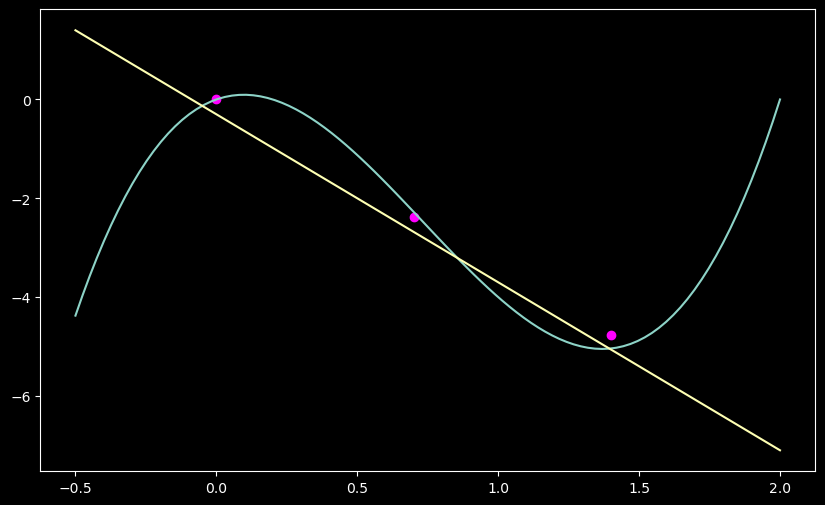

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
x = np.linspace(-0.5, 2, 100)
plt.plot(x, x*(5*x-1)*(x-2))
y = np.linspace(0, 1.4, 3)
plt.scatter(y, -3.4*y, color="#FF00FF")
z = np.linspace(-0.5, 2, 50)
plt.plot(z, -3.4 * z-0.3)

## Pipeline

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from warnings import simplefilter
simplefilter(action='ignore', category=DeprecationWarning)

pipe = Pipeline([
    ('scale', 'passthrougn'),
    ('regression', SVR())
])

In [21]:
pipe.set_params(regression__C=10)

Pipeline(steps=[('scale', 'passthrougn'), ('regression', SVR(C=10))])

In [22]:
param_grid = dict(regression__C=[0.1, 10, 100])

In [23]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipe, param_grid, verbose=1, cv=3)
grid_search

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', 'passthrougn'),
                                       ('regression', SVR(C=10))]),
             param_grid={'regression__C': [0.1, 10, 100]}, verbose=1)

## Scalers
- StandardScaler (standaryzacja = odejmuje średnią, dzieli przez wariancję)
- Normalizer (normalizacja = dzieli przez długość == wektor o normie 1)
- RobustScaler (odejmuje medianę i skaluje kwartylami)

In [24]:
from time import time

param_grid = dict(
    scale = ['passthrough', StandardScaler(), Normalizer()],
    regression__C = [10, 100],
    regression__kernel = ['linear']
)


print(param_grid)

#############
grid_search = GridSearchCV(pipe, param_grid, verbose=1, cv=5, n_jobs=2)
#############

t0 = time()
grid_search.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print()
print(grid_search.best_estimator_)
print()
print(f"Best score: {grid_search.best_score_}")



{'scale': ['passthrough', StandardScaler(), Normalizer()], 'regression__C': [10, 100], 'regression__kernel': ['linear']}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
done in 2.451s

Pipeline(steps=[('scale', StandardScaler()),
                ('regression', SVR(C=10, kernel='linear'))])

Best score: 0.17515158494581087


___
## Pipeline dla tekstu

In [25]:
tfidf = TfidfVectorizer()
tfs = tfidf.fit_transform(df['text'])
tfs

<425x13155 sparse matrix of type '<class 'numpy.float64'>'
	with 99849 stored elements in Compressed Sparse Row format>

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

class ItemSelactor(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

pipeline = Pipeline([
    ('selector', ItemSelactor(key='text')),
    ('tridf', TfidfVectorizer()),
    ('best', TruncatedSVD(n_components=250)), 
    ('linear', LinearRegression())
])

y = dum_df['price_per_metr']
X = dum_df.drop(['price_per_metr'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(list(scores))
print()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.2827794091377477, 0.38975499390796575, 0.04185490536372416, -0.4994460373308762, 0.5374669785949002]

Accuracy: 0.15 (+/- 0.73)


In [27]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from time import time
from warnings import simplefilter
simplefilter(action='ignore', category=DeprecationWarning)

class ItemSelactor(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]


parameters = {
    'best__n_components': (250,),
    'svr__C': (100, 1000),
    'svr__kernel': ('linear', 'rbf')
}

pipeline = Pipeline([
    ('selector', ItemSelactor(key='text')),
    ('tridf', TfidfVectorizer()),
    ('best', TruncatedSVD()), 
    ('svr', SVR())
])

grid_search = GridSearchCV(pipeline, parameters, verbose=1, cv=5, n_jobs=2)

y = dum_df['price_per_metr']
X = dum_df.drop(['price_per_metr'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

t0 = time()
grid_search.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
done in 17.749s
Best parameters set:
	best__n_components: 250
	svr__C: 1000
	svr__kernel: 'linear'


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from operator import itemgetter

vectorizer = TfidfVectorizer(min_df=2)
X = vectorizer.fit_transform(X_train['text'])

sorted(zip(vectorizer.idf_, vectorizer.get_feature_names_out()), key=itemgetter(0), reverse=True)[:40]

[(5.8494227005125365, '0000'),
 (5.8494227005125365, '006'),
 (5.8494227005125365, '006570'),
 (5.8494227005125365, '020'),
 (5.8494227005125365, '0200'),
 (5.8494227005125365, '03m2'),
 (5.8494227005125365, '045653956ogłoszenie'),
 (5.8494227005125365, '050'),
 (5.8494227005125365, '070'),
 (5.8494227005125365, '087ola2'),
 (5.8494227005125365, '09'),
 (5.8494227005125365, '090'),
 (5.8494227005125365, '099600'),
 (5.8494227005125365, '09m2'),
 (5.8494227005125365, '101'),
 (5.8494227005125365, '104'),
 (5.8494227005125365, '1045653956'),
 (5.8494227005125365, '105'),
 (5.8494227005125365, '1100'),
 (5.8494227005125365, '112'),
 (5.8494227005125365, '115'),
 (5.8494227005125365, '115m2'),
 (5.8494227005125365, '119577'),
 (5.8494227005125365, '11km'),
 (5.8494227005125365, '121'),
 (5.8494227005125365, '127'),
 (5.8494227005125365, '128'),
 (5.8494227005125365, '133'),
 (5.8494227005125365, '134696'),
 (5.8494227005125365, '136'),
 (5.8494227005125365, '143'),
 (5.8494227005125365, '1

In [43]:
import gzip
import sys
import re

splitter = re.compile(r'[^ąćęńłóśźż\w]+')
isnumber = re.compile(r'[0-9]')

f = gzip.open('data/odm.txt.gz', 'rt', encoding='utf-8')
dictionary = {}
set_dict = set()

for x in f:
    t = x.strip().split(',')
    tt = [x.strip().lower() for x in t]
    for w in tt:
        set_dict.add(w)
        dictionary[w] = tt[0]

def lematize(w):
    w = w.replace('ą', 'ą')
    w = w.replace('ó','ó')
    w = w.replace('ę','ę')
    w = w.replace('ż','ż')
    return dictionary.get(w,w)

opis1 = dum_df['text'].iloc[0]

raw_corpus = []
n=0

for i in dum_df.iterrows():
    n=+1
    l = list(splitter.split(i[1][1]))
    raw_corpus.append(l)

all_words = []
for t in raw_corpus:
    all_words[0:0] = t

words = {}
for w in all_words:
    rec = words.get(w.lower(), {'upper': 0, 'lower': 0})
    if w.lower()==w or w.upper()==w:
        rec['lower'] = rec['lower'] + 1
    else:
        rec['upper'] = rec['upper'] + 1
    words[w.lower()] = rec

raw_stop_words = [x for x in words.keys() if words[x]['upper'] >= words[x]['lower'] * 4]

set_raw_stop_words = set(raw_stop_words)

C:\Users\Toma\AppData\Local\Temp\ipykernel_13324\2440413424.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  l = list(splitter.split(i[1][1]))


In [44]:
raw_stop_words[:20]

['najważniejsze',
 'krakowa',
 'lokalufort',
 'natura',
 'skrócienowoczesna',
 'krakowie',
 'fort',
 'istotną',
 'wartym',
 'pozostawiony',
 'lokalizacjabudynki',
 'józefa',
 'wybickiego',
 'prądnik',
 'biały',
 'zieloneinwestycja',
 'parku',
 'krowoderskiego',
 'stanisława',
 'wyspiańskiego']

In [45]:
def preprocessing(opis, filter_raw=True, filter_dict=True):
    opis = str(opis)
    tokenized = splitter.split(opis)
    l = list(tokenized)
    l = [x.lower() for x in l]
    l = [x for x in l if len(x) > 2]
    l = [x for x in l if x.find('_') < 0]
    l = [x for x in l if isnumber.search(x) is None]
    if filter_raw: l = [x for x in l if x not in set_raw_stop_words]
    if filter_dict: l = [x for x in l if x in set_dict]
    l = [lematize(x) for x in l]
    l = [x for x in l if len(x) > 2]
    return l


In [46]:
opis1

' Najważniejsze atuty  Teren zielony znajdujący się bezpośrednio na osiedlu Idealne połączenie mieszkań w centrum Krakowa z bliskością natury Mieszkania zaprojektowane z myślą o funkcjonalności i ergonomii przestrzeni oraz wysokim standardzie wykończenia Ogrzewanie podłogowe, klimatyzacja i filtry antysmogowe w każdym lokaluFort Natura w skrócieNowoczesna architektura, wysoka jakość projektu i użytych materiałów – to główne atuty tej inwestycji w Krakowie. Fort Natura oferuje mieszkania liczące od 27 do 74 m kw zaprojektowane funkcjonalnie i ergonomicznie oraz o wysokim standardzie wykończenia. Do lokali na parterze przynależą ogródki, a na piętrach – szerokie balkony. W każdym z lokali zainstalowane zostaną ogrzewanie podłogowe, klimatyzacja i filtry antysmogowe. Istotną częścią osiedla będzie także odbudowa istniejącego na terenie osiedla fortu, który stanie się lokalem usługowym z własnym podziemnym garażem. Wartym uwagi atutem inwestycji jest również teren zielony, przynależny do o

In [47]:
print(preprocessing(opis1))

['atut', 'teren', 'zielony', 'znajdywać', 'się', 'bezpośredni', 'osiedle', 'idealny', 'połączyć', 'mieszkanie', 'centrum', 'bliskość', 'natura', 'mieszkanie', 'zaprojektować', 'myśleć', 'funkcjonalność', 'ergonomia', 'przestrzeń', 'oraz', 'wysoki', 'standard', 'wykończyć', 'ogrzewanie', 'podłogowy', 'klimatyzacja', 'filtry', 'antysmogowy', 'każdy', 'architektura', 'wysoki', 'jakość', 'projekt', 'użyć', 'materiały', 'główny', 'atut', 'ten', 'inwestycja', 'oferować', 'mieszkanie', 'liczyć', 'zaprojektować', 'funkcjonalny', 'ergonomiczny', 'oraz', 'wysoki', 'standard', 'wykończyć', 'lokal', 'parter', 'przynależeć', 'ogródka', 'piętro', 'szeroki', 'balkon', 'każdy', 'lokal', 'zainstalować', 'zostać', 'ogrzewanie', 'podłogowy', 'klimatyzacja', 'filtry', 'antysmogowy', 'część', 'osiedle', 'być', 'także', 'odbudowa', 'istniejący', 'terenia', 'osiedle', 'fort', 'który', 'stanąć', 'się', 'lokal', 'usługowy', 'własny', 'podziemny', 'garaż', 'uwaga', 'atut', 'inwestycja', 'być', 'również', 'teren

In [50]:
print(preprocessing(opis1, filter_raw=False))

['najważniejszy', 'atut', 'teren', 'zielony', 'znajdywać', 'się', 'bezpośredni', 'osiedle', 'idealny', 'połączyć', 'mieszkanie', 'centrum', 'kraków', 'bliskość', 'natura', 'mieszkanie', 'zaprojektować', 'myśleć', 'funkcjonalność', 'ergonomia', 'przestrzeń', 'oraz', 'wysoki', 'standard', 'wykończyć', 'ogrzewanie', 'podłogowy', 'klimatyzacja', 'filtry', 'antysmogowy', 'każdy', 'natura', 'architektura', 'wysoki', 'jakość', 'projekt', 'użyć', 'materiały', 'główny', 'atut', 'ten', 'inwestycja', 'kraków', 'forta', 'natura', 'oferować', 'mieszkanie', 'liczyć', 'zaprojektować', 'funkcjonalny', 'ergonomiczny', 'oraz', 'wysoki', 'standard', 'wykończyć', 'lokal', 'parter', 'przynależeć', 'ogródka', 'piętro', 'szeroki', 'balkon', 'każdy', 'lokal', 'zainstalować', 'zostać', 'ogrzewanie', 'podłogowy', 'klimatyzacja', 'filtry', 'antysmogowy', 'istotny', 'część', 'osiedle', 'być', 'także', 'odbudowa', 'istniejący', 'terenia', 'osiedle', 'fort', 'który', 'stanąć', 'się', 'lokal', 'usługowy', 'własny', 

In [51]:
print(preprocessing(opis1, filter_dict=False))

['atut', 'teren', 'zielony', 'znajdywać', 'się', 'bezpośredni', 'osiedle', 'idealny', 'połączyć', 'mieszkanie', 'centrum', 'bliskość', 'natura', 'mieszkanie', 'zaprojektować', 'myśleć', 'funkcjonalność', 'ergonomia', 'przestrzeń', 'oraz', 'wysoki', 'standard', 'wykończyć', 'ogrzewanie', 'podłogowy', 'klimatyzacja', 'filtry', 'antysmogowy', 'każdy', 'architektura', 'wysoki', 'jakość', 'projekt', 'użyć', 'materiały', 'główny', 'atut', 'ten', 'inwestycja', 'oferować', 'mieszkanie', 'liczyć', 'zaprojektować', 'funkcjonalny', 'ergonomiczny', 'oraz', 'wysoki', 'standard', 'wykończyć', 'lokal', 'parter', 'przynależeć', 'ogródka', 'piętro', 'szeroki', 'balkon', 'każdy', 'lokal', 'zainstalować', 'zostać', 'ogrzewanie', 'podłogowy', 'klimatyzacja', 'filtry', 'antysmogowy', 'część', 'osiedle', 'być', 'także', 'odbudowa', 'istniejący', 'terenia', 'osiedle', 'fort', 'który', 'stanąć', 'się', 'lokal', 'usługowy', 'własny', 'podziemny', 'garaż', 'uwaga', 'atut', 'inwestycja', 'być', 'również', 'teren

In [52]:
print(preprocessing(opis1, filter_raw=False, filter_dict=False))

['najważniejszy', 'atut', 'teren', 'zielony', 'znajdywać', 'się', 'bezpośredni', 'osiedle', 'idealny', 'połączyć', 'mieszkanie', 'centrum', 'kraków', 'bliskość', 'natura', 'mieszkanie', 'zaprojektować', 'myśleć', 'funkcjonalność', 'ergonomia', 'przestrzeń', 'oraz', 'wysoki', 'standard', 'wykończyć', 'ogrzewanie', 'podłogowy', 'klimatyzacja', 'filtry', 'antysmogowy', 'każdy', 'lokalufort', 'natura', 'skrócienowoczesna', 'architektura', 'wysoki', 'jakość', 'projekt', 'użyć', 'materiały', 'główny', 'atut', 'ten', 'inwestycja', 'kraków', 'forta', 'natura', 'oferować', 'mieszkanie', 'liczyć', 'zaprojektować', 'funkcjonalny', 'ergonomiczny', 'oraz', 'wysoki', 'standard', 'wykończyć', 'lokal', 'parter', 'przynależeć', 'ogródka', 'piętro', 'szeroki', 'balkon', 'każdy', 'lokal', 'zainstalować', 'zostać', 'ogrzewanie', 'podłogowy', 'klimatyzacja', 'filtry', 'antysmogowy', 'istotny', 'część', 'osiedle', 'być', 'także', 'odbudowa', 'istniejący', 'terenia', 'osiedle', 'fort', 'który', 'stanąć', 'si

In [53]:
dum_df["opisTT"] = dum_df['text'].apply(lambda x: ' '.join(preprocessing(x, filter_raw=True, filter_dict=True)))
dum_df["opisTF"] = dum_df['text'].apply(lambda x: ' '.join(preprocessing(x, filter_raw=True, filter_dict=False)))
dum_df["opisFT"] = dum_df['text'].apply(lambda x: ' '.join(preprocessing(x, filter_raw=False, filter_dict=True)))
dum_df["opisFF"] = dum_df['text'].apply(lambda x: ' '.join(preprocessing(x, filter_raw=False, filter_dict=False)))

___
## Pipeline kompozytowy

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from time import time
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.compose import TransformedTargetRegressor


class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key=''):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]


class ItemUnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, keys=[]):
        self.keys = keys

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict.drop(self.keys, axis=1)


pipeline = Pipeline([
    ('union',
         FeatureUnion(
             transformer_list=[
                 ('table', 
                      Pipeline([
                          ('selector1', ItemUnSelector(keys=['text', 'opisTT', 'opisTF', 'opisFT', 'opisFF'])),
                          ('scaler1', 'passthrough')
                      ])
                 ),
                 ('description',
                      Pipeline([
                          ('selector2', ItemSelector()),
                          ('tfidf', TfidfVectorizer()),
                          ('best', TruncatedSVD()),
                          ('scaler2', 'passthrough')
                      ])
                 )
             ]
         )
    ),
    ('regressor', TransformedTargetRegressor())
])

parameters = {
    'union__transformer_weights': [{'table': 1.0, 'description': 1.0}],

    'union__description__best__n_components': (3,),
    'union__description__tfidf__min_df': (3,),
    'union__description__tfidf__binary': (True,),
    'union__description__selector2__key': ['text', 'opisTT', 'opisTF', 'opisFT', 'opisFF'],

    'union__table__scaler1': [ RobustScaler()],
    'union__description__scaler2': [ RobustScaler(with_centering=False)],

    'regressor': [ GradientBoostingRegressor()]
}

grid_search = GridSearchCV(pipeline, parameters, verbose=1, cv=10, n_jobs=4)


y = dum_df['price_per_metr']
X = dum_df.drop(['price_per_metr'], axis=1)

t0 = time()
grid_search.fit(X, y)
print("done in %0.3f" %(time() - t0))

print(f'Best score: {grid_search.best_score_}')

print("Best parameters set:")
print()
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 10 folds for each of 5 candidates, totalling 50 fits
done in 6.947
Best score: 0.32207811882125936
Best parameters set:

	regressor: GradientBoostingRegressor()
	union__description__best__n_components: 3
	union__description__scaler2: RobustScaler(with_centering=False)
	union__description__selector2__key: 'opisTF'
	union__description__tfidf__binary: True
	union__description__tfidf__min_df: 3
	union__table__scaler1: RobustScaler()
	union__transformer_weights: {'table': 1.0, 'description': 1.0}


## Uwaga! Może długo trwać!
Jeśli możliwe, to szukać pojedyńczo, albo:

## Grid Strategies:
 - HalvingGridSearchCV
 -- przeszukiwanie przez podział binarny

- RandomizedSearchCV
-- w odróżnieniu od GridSearch nie wsyztskie parametry są sprwadzane, ale n_iter z pernwgo rozkładu
-- Jeśli parametry są na liście - losowanie bez zwracania jest dokonane

- HalvingRandomSearchCV
-- parametry są przeszukiwane losowo z coraz węższego zakresu

- auto-sklearn
-- yżywa nauczanua maszynowego do wyboru algorytmy i dobrania hiperparametrów